In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/seqana'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seqana/221202_seqana_data_science_working_student_challenge_dataset.csv


In [2]:
#installing lazypredict library
!pip install lazypredict

## Problem Statement:
This challenge is to carry out exploratory data analysis relating to the dataset provided by Seqana as a home assignment. It is also demonstrating train and test ML models for the target variable which is `soc_stock_t_ha`. 

Since no additional information have been given, such as data dictionary, the exploration of the dataset will be done on the go. 

In [3]:
#importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 4000

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
print(tf.__version__)

import lazypredict
from lazypredict.Supervised import LazyRegressor

2.6.4


In [4]:
#reading the dataset
df = pd.read_csv('../input/seqana/221202_seqana_data_science_working_student_challenge_dataset.csv')

In [5]:
#checking the first five rows of the dataset
df.head()

,year,dem_nasa_dem30,dem_merit,dem_gmted,dem_srtm90_v4,dem_nasa_srtm30,dem_usgs_ned,terrain_topo_div_alos_constant,terrain_mtpi_alos_AVE,terrain_chili_alos_constant,...,sur_refl_b02_mean_sampling_year,sur_refl_b03_mean_sampling_year,sur_refl_b07_mean_sampling_year,evi_std_sampling_year,ndvi_std_sampling_year,sur_refl_b01_std_sampling_year,sur_refl_b02_std_sampling_year,sur_refl_b03_std_sampling_year,sur_refl_b07_std_sampling_year,soc_stock_t_ha
0,2012,894,899.79,898,892,894,895.90,0.31,-4,183,...,3374.61,1089.26,1546.87,1574.50,2215.65,1688.02,1375.51,1220.17,654.96,68.79
1,2011,61,56.90,58,58,57,58.00,0.12,-7,181,...,2709.61,374.48,1166.39,1582.04,1427.60,307.31,999.50,167.00,501.50,87.27
2,2011,92,92.47,89,91,90,92.73,0.05,-1,181,...,3195.04,414.35,1221.35,1927.97,1960.70,583.72,1090.23,322.37,434.76,96.65
3,2011,1560,1572.30,1622,1570,1549,1547.68,0.78,-17,160,...,4063.73,1790.04,928.96,1010.63,1903.29,2179.13,2019.11,1884.02,472.45,68.40
4,2011,1176,1175.50,1179,1176,1176,1170.96,0.21,-2,181,...,2652.26,1022.22,864.57,646.83,1687.59,922.47,857.20,1366.89,303.00,35.31


## Exploratory Data Analysis

Quick check for duplicated rows.

In [6]:
#checking for duplicates
df.duplicated().sum()

0

No duplicate rows found. 

Next check for any null values.

In [7]:
#checking for null values
df.isnull().sum()

year                                   0
dem_nasa_dem30                         0
dem_merit                              0
dem_gmted                              0
dem_srtm90_v4                          0
dem_nasa_srtm30                        0
dem_usgs_ned                           0
terrain_topo_div_alos_constant         0
terrain_mtpi_alos_AVE                  0
terrain_chili_alos_constant            0
soil_olm_bd_b0                         0
soil_olm_bd_b10                        0
soil_olm_bd_b30                        0
soil_olm_bd_b60                        0
soil_olm_bd_b100                       0
soil_olm_clay_b0                       0
soil_olm_clay_b10                      0
soil_olm_clay_b30                      0
soil_olm_clay_b60                      0
soil_olm_clay_b100                     0
soil_olm_soc_b0                        0
soil_olm_soc_b10                       0
soil_olm_soc_b30                       0
soil_olm_soc_b60                       0
soil_olm_soc_b10

None of the rows have any null values.

Moving on to the data statistics.

In [8]:
#describing the data statistics
df.describe()

,year,dem_nasa_dem30,dem_merit,dem_gmted,dem_srtm90_v4,dem_nasa_srtm30,dem_usgs_ned,terrain_topo_div_alos_constant,terrain_mtpi_alos_AVE,terrain_chili_alos_constant,...,sur_refl_b02_mean_sampling_year,sur_refl_b03_mean_sampling_year,sur_refl_b07_mean_sampling_year,evi_std_sampling_year,ndvi_std_sampling_year,sur_refl_b01_std_sampling_year,sur_refl_b02_std_sampling_year,sur_refl_b03_std_sampling_year,sur_refl_b07_std_sampling_year,soc_stock_t_ha
count,5091.00,5091.00,5091.00,5091.00,5091.00,5091.00,5091.00,5091.00,5091.00,5091.00,...,5091.00,5091.00,5091.00,5091.00,5091.00,5091.00,5091.00,5091.00,5091.00,5091.00
mean,2011.01,703.00,702.99,704.89,704.10,704.30,702.36,0.17,-1.47,196.27,...,2926.50,934.48,1443.62,1276.09,1630.34,1065.66,1068.49,1036.45,453.21,69.40
std,0.29,689.40,689.82,689.33,689.65,689.57,689.94,0.17,15.52,19.44,...,576.32,709.49,646.01,669.57,828.00,1005.47,618.38,1079.21,197.82,67.24
min,2011.00,-64.00,-62.49,-62.00,-64.00,-64.00,-64.75,0.01,-146.00,65.00,...,884.87,57.04,209.09,43.46,32.17,44.81,121.46,25.80,72.23,0.18
25%,2011.00,178.50,177.08,179.00,179.00,179.00,177.30,0.06,-4.00,184.00,...,2531.98,382.57,991.35,716.76,970.81,222.69,588.57,107.90,305.69,30.20
50%,2011.00,383.00,382.27,384.00,383.00,381.00,381.22,0.10,0.00,199.00,...,2842.70,736.91,1322.61,1264.97,1594.60,639.54,924.88,649.36,415.92,49.24
75%,2011.00,1228.00,1228.78,1230.00,1229.00,1228.50,1229.92,0.21,2.00,210.00,...,3244.17,1234.74,1741.20,1831.89,2293.52,1741.37,1392.18,1767.08,572.04,82.37
max,2019.00,3531.00,3521.04,3523.00,3580.00,3536.00,3522.89,1.00,150.00,252.00,...,5668.82,4272.30,4684.83,3406.65,3559.26,3867.80,3193.91,4049.05,1249.75,497.76


The data spans between the years 2011 and 2019. 

Since no background information of the data was shared, no specific conclusion could be derived relating to the values under 306 columns.

I will be checking the statistics for our target variable.

In [9]:
#describing statistics for soc_stock_t_ha
df['soc_stock_t_ha'].describe()

count   5091.00
mean      69.40
std       67.24
min        0.18
25%       30.20
50%       49.24
75%       82.37
max      497.76
Name: soc_stock_t_ha, dtype: float64

The 50% of the values comprise within 49.29, with mean as 69.40 but the max being 497.76. I might indicate that this column is positively skewed but I will verify it in the next steps.
(As a side note, does "ha" in the name refer to hectare?)

In [10]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5091 entries, 0 to 5090
Columns: 306 entries, year to soc_stock_t_ha
dtypes: float64(212), int64(94)
memory usage: 11.9 MB


As we clearly see from this info, there are only numerical values and no categorical values. 

We have 306 columns and 5091 rows. It made me wondered if this is just a sample dataset that was derived from a bigger dataset.

For a quick overview and cleaning, I run the dataset  in Tableau Prep Builder. One thing that intrigued me was that under `year`, there were only 4 values, and more than 99% of the data related to `2011`. The same result is indicated below as I verified it in this notebook.  

Therefore I decided to remove the data (13 rows) relating to the other 3 years (as there was very little data for a 'time-series' analysis).

In [11]:
#reading the total count of rows based on years
df_year_per = df.groupby('year')['soc_stock_t_ha'].count().reset_index()

#calculating the percentage
df_year_per['Percentage'] = 100 * df_year_per['soc_stock_t_ha']  / df_year_per['soc_stock_t_ha'].sum()

df_year_per

,year,soc_stock_t_ha,Percentage
0,2011,5078,99.74
1,2012,6,0.12
2,2016,1,0.02
3,2019,6,0.12


In [12]:
#filtering out the dataset to pick out the rows only for year 2011 and reseting index 
df = df[df.year == 2011]
df.reset_index(drop = True, inplace = True)

Now I am doing the exploration of our target value `soc_stock_t_ha`. As per the histogram, the values are positively skewed (right skewed), which was also noticed above in the statistical description.

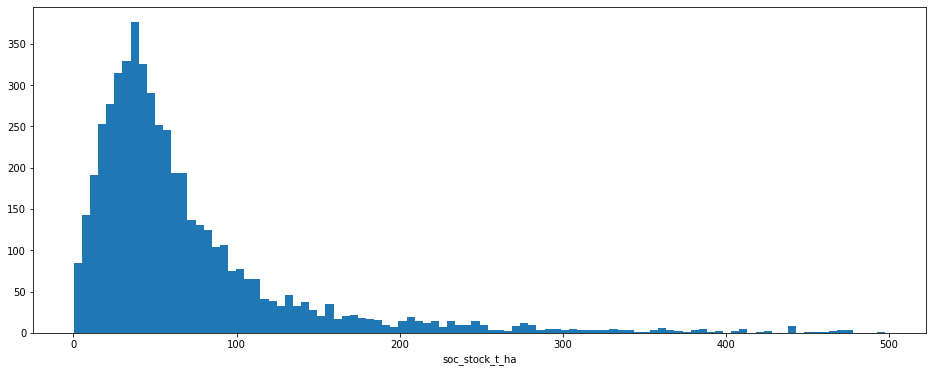

In [13]:
#plotting histogram for 'soc_stock_t_ha'
plt.figure(figsize=(16, 6))
plt.hist(df["soc_stock_t_ha"], bins = 100)
plt.xlabel('soc_stock_t_ha');

I have created a new dataset named `df_soc_stock_t_ha_200` that stores the values only from 0 to 200 for`soc_stock_t_ha`, which may disregards the outliers and focuses only on the concentrated part. 

I will be using this for modelling later out of curiosity to check if it affects the model metrics.

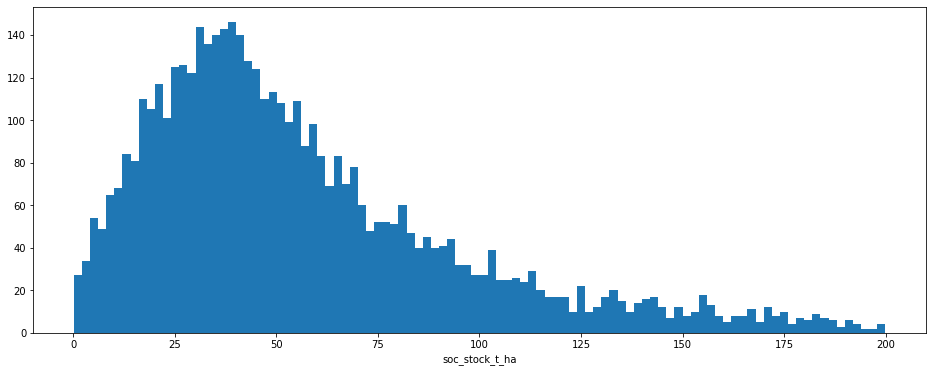

In [14]:
df_soc_stock_t_ha_200 = df[df["soc_stock_t_ha"] <= 200]

#plotting histogram for 'soc_stock_t_ha'
plt.figure(figsize=(16, 6))
plt.hist(df_soc_stock_t_ha_200["soc_stock_t_ha"], bins = 100)
plt.xlabel('soc_stock_t_ha');

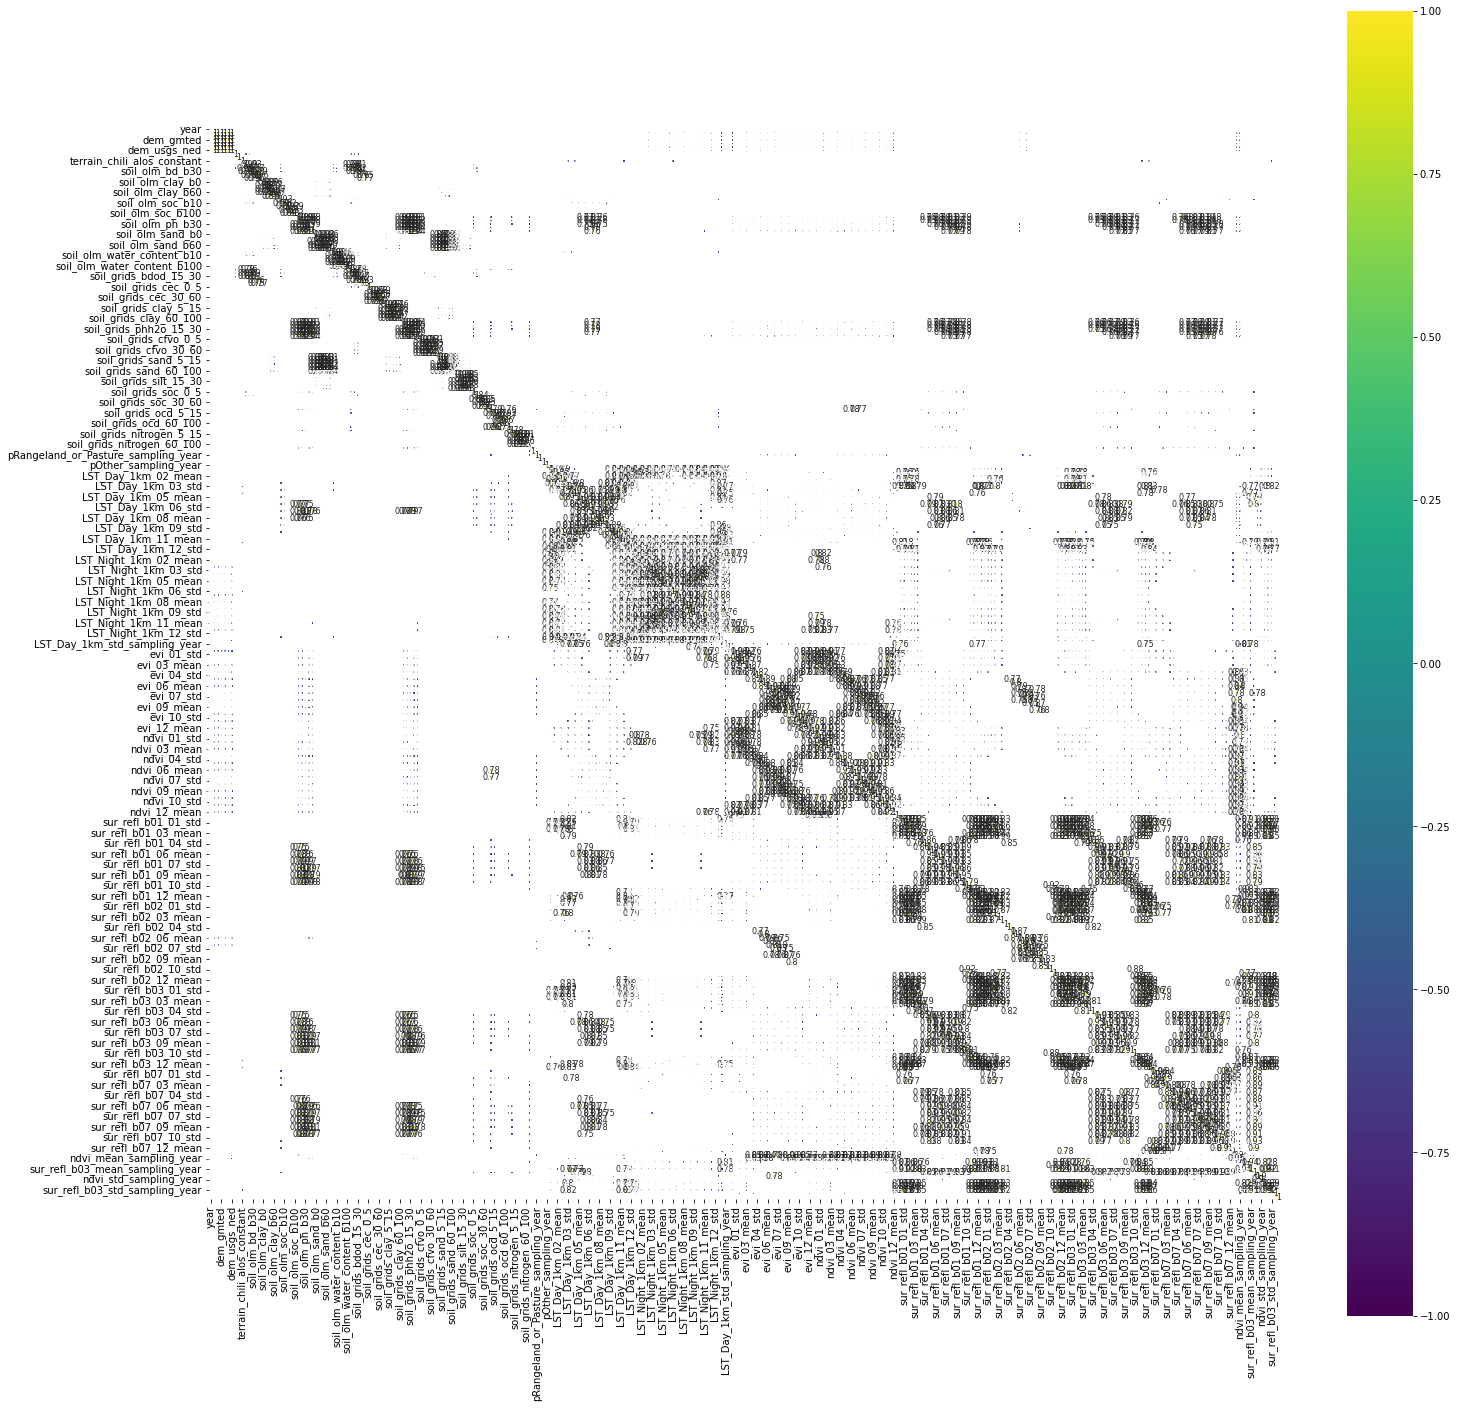

In [15]:
#correlation plot
df_corr = df.corr() 
fig, ax = plt.subplots(figsize = (24, 24))         
sns.heatmap(df_corr[(df_corr >= 0.75) | (df_corr <= -0.50)], 
            cmap = 'viridis', vmax = 1.0, vmin = -1.0, linewidths = 0.1, 
            annot = True, annot_kws = {"size": 8}, square = True, ax = ax);

From the above, it can be seen that strong positive and negative correlations exist among the features of this dataset. The correlation matrix is not very readable but I just wanted to have an indication of what is going on in the dataset rather than digging deep in it due to time limitations. 

Although now I will be checking which feature affects the target variable `soc_stock_t_ha` the most.

In [16]:
#checking the correlations of dataset with the soc_stock_t_ha in descending order
df.corrwith(df["soc_stock_t_ha"]).sort_values(ascending = False)

soc_stock_t_ha                         1.00
soil_grids_soc_5_15                    0.52
soil_grids_soc_0_5                     0.50
soil_grids_ocd_5_15                    0.49
soil_grids_nitrogen_0_5                0.48
soil_olm_soc_b0                        0.48
soil_grids_ocd_0_5                     0.46
soil_olm_soc_b10                       0.46
soil_grids_ocs_0_30                    0.45
soil_grids_soc_15_30                   0.42
soil_grids_cec_0_5                     0.42
soil_grids_ocd_15_30                   0.42
ndvi_06_mean                           0.41
soil_grids_nitrogen_5_15               0.40
ndvi_07_mean                           0.38
ndvi_08_mean                           0.37
ndvi_09_mean                           0.36
evi_06_mean                            0.36
ndvi_05_mean                           0.34
soil_grids_soc_30_60                   0.32
evi_07_mean                            0.32
ndvi_10_mean                           0.32
ndvi_std_sampling_year          

So, the target variable is positively and negatively correlated with few features. These correlations are moderate (two features) and weak. 

Based upon this result, feature selection can be introduced for modelling, although I will not be doing that for this assignment as I just want to see the overall result of the modelling based on all the features. 

That being said, I will still be plotting pairplots for the three most positively correlated and three most negatively correlated features to `soc_stock_t_ha`.

In [17]:
#creating a new dataframe with the selected columns specified above
df_plot = df[['soc_stock_t_ha', 'soil_grids_soc_5_15', 'soil_grids_soc_0_5', 'soil_grids_ocd_5_15', 
             'LST_Day_1km_06_mean', 'LST_Day_1km_08_mean', 'soil_grids_bdod_0_5']].copy()

df_plot.head()

,soc_stock_t_ha,soil_grids_soc_5_15,soil_grids_soc_0_5,soil_grids_ocd_5_15,LST_Day_1km_06_mean,LST_Day_1km_08_mean,soil_grids_bdod_0_5
0,87.27,239,374,312,14954.61,15274.42,135
1,96.65,286,413,327,14967.50,15443.03,118
2,68.40,297,609,270,14994.80,15211.86,112
3,35.31,375,888,289,14918.70,15135.74,110
4,54.57,197,266,205,14980.40,15260.14,126


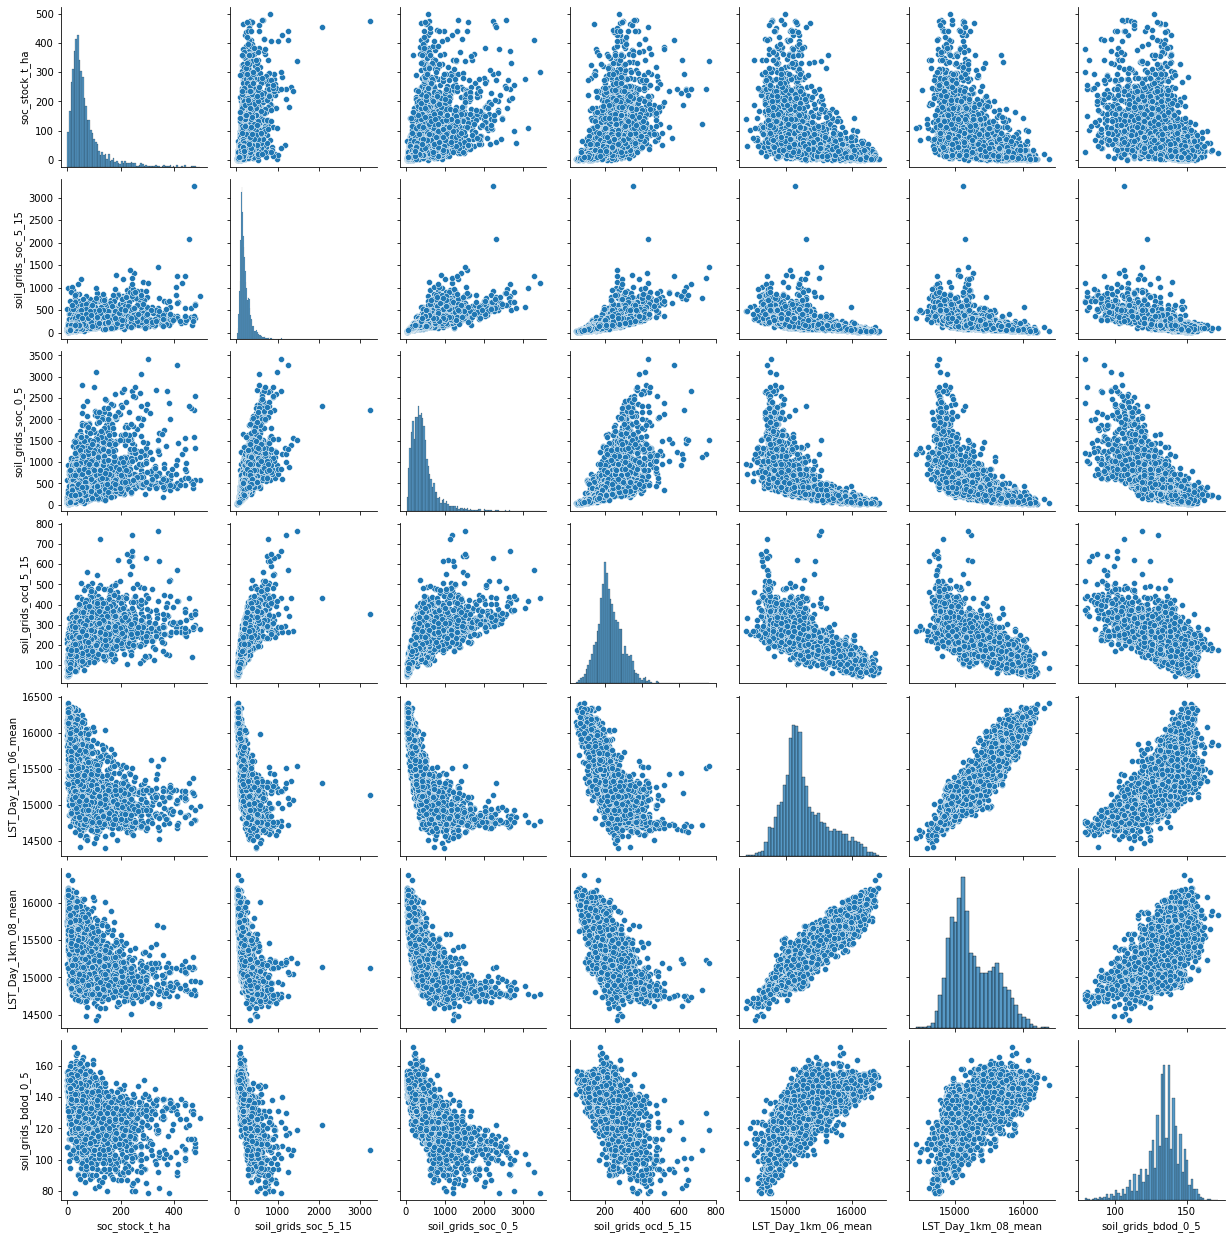

In [18]:
#plotting the pairplot for the above selected columns
sns.pairplot(df_plot);

The scattering of values clearly verifies the correlation I was seeing earlier. 

Since I did not have any glossary for the given dataset, the very question that arises in my mind is that what is causing these correlations. As stated by everyone, "Correlation does not imply causation
". I cannot be judge of that here since I clearly do not know the dataset. 

But another thing that intrigues me are the column names, like `soil_grids_soc_5_15` and `soil_grids_soc_0_5`, that were positively correlated to `soc_stock_t_ha`, have the same name structure but the values differ (are these value bins?). If referred to the correlation table of `soc_stock_t_ha`, more features like this can be found. 

The same goes for negatively correlated columns, where most of the column names end with `mean`. 

If given the data dictionary (and subject matter experts guidance), I might be able to understand it more appropriately.

Now we move on to modelling.

## Modelling

In this section, I will be doing two types of modelling:

- Regressor ML Modelling using LazyPredict
- Deep Learning Modelling using tensorflow

### Machine Learning Modelling

Lazy Predict is a python library that helps to semi-automate Machine Learning Tasks. It builds a lot of basic models without a lot of codes and helps understand which models fit better without any parameter tuning. I will be using Lazy Regressor, as I am solving a regression problem.

In [19]:
#separating dataset into dependent and independent features
X = df.drop(["year", "soc_stock_t_ha"], axis = 1)
y = df["soc_stock_t_ha"]

#splitting dataset into training and testing part (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

#pre-processing using standard scalar
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#creating an object of LazyRegressor class
reg = LazyRegressor(verbose = 0, ignore_warnings = False, custom_metric = None)

#fitting data in LazyClassifier
models, pred = reg.fit(X_train, X_test, y_train, y_test)

#evaluating the models
models

100%|██████████| 42/42 [15:16<00:00, 21.83s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.27,0.49,46.81,21.75
LGBMRegressor,0.24,0.47,47.73,2.01
HistGradientBoostingRegressor,0.22,0.46,48.31,1.46
RandomForestRegressor,0.22,0.45,48.43,89.52
MLPRegressor,0.21,0.45,48.66,7.92
GradientBoostingRegressor,0.20,0.44,48.93,32.35
PoissonRegressor,0.16,0.41,50.19,0.12
KNeighborsRegressor,0.16,0.41,50.22,0.16
BayesianRidge,0.15,0.41,50.37,0.23


As it can be seen above, `ExtraTreesRegressor` model was the best fit for the given dataset, but it is not good enough. Hence I will be training the next model using the `df_soc_stock_t_ha_200` dataset that I described previously.

In [20]:
#separating dataset into dependent and independent features
X = df_soc_stock_t_ha_200.drop(["year", "soc_stock_t_ha"], axis = 1)
y = df_soc_stock_t_ha_200["soc_stock_t_ha"]

#splitting dataset into training and testing part (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

#pre-processing using standard scalar
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#creating an object of LazyRegressor class
reg = LazyRegressor(verbose = 0, ignore_warnings = False, custom_metric = None)

#fitting data in LazyClassifier
models, pred = reg.fit(X_train, X_test, y_train, y_test)

#evaluating the models
models

100%|██████████| 42/42 [12:40<00:00, 18.11s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.14,0.42,29.80,1.54
PoissonRegressor,0.14,0.41,29.90,0.11
ExtraTreesRegressor,0.14,0.41,29.91,19.54
LGBMRegressor,0.14,0.41,29.92,1.34
GradientBoostingRegressor,0.13,0.41,30.05,30.21
RidgeCV,0.13,0.40,30.08,0.21
RandomForestRegressor,0.13,0.40,30.11,71.87
LassoLarsIC,0.13,0.40,30.11,0.35
BayesianRidge,0.12,0.40,30.22,0.17


As per the table, `HistGradientBoostingRegressor` model was the best fit for the given dataset, although `ExtraTreesRegressor` model was listed as the third best this time. 

Also, since the range of values of the target variable is between 0 - 500, the RMSE value of `HistGradientBoostingRegressor` model (29.80) indicates that the model fits a lot better compared to our previous model, where the `ExtraTreesRegressor` model had RMSE of 46.81. 

### Deep Learning Modelling

Now I will go on with neural network models.

In [21]:
#separating dataset into dependent and independent features
X = df.drop(["year", "soc_stock_t_ha"], axis = 1)
y = df["soc_stock_t_ha"]

#splitting dataset into training and testing part (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

#pre-processing using standard scalar
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#building and creating the neural network model
tf.random.set_seed(64)
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
tf_model.compile(loss = 'mae', 
                 optimizer = 'sgd')

#fitting the model
history = tf_model.fit(X_train, y_train, batch_size = 64, epochs = 100, verbose = 0)

#viewing the summary of the trained model
tf_model.summary()

#evaluating the model
tf_model.evaluate(X_test, y_test)

2022-12-28 21:38:26.921579: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-28 21:38:27.016977: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               30500     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 36,071
Trainable params: 36,071
Non-trainable params: 0
_________________________________________________________________
32/32 [==============================] - 0s 1ms/step - loss: 30.1140


30.114028930664062

Text(0.5, 0, 'Epochs')

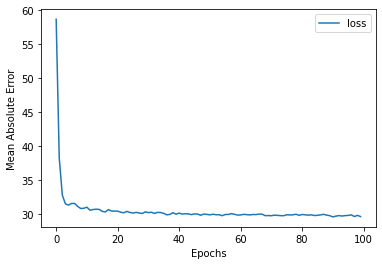

In [22]:
#plot history (Also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Mean Absolute Error")
plt.xlabel("Epochs")

So with this model, I achieved MAE of 30.11. 

Now I will be training a different model, which uses the `df_soc_stock_t_ha_200` dataset with the same hyperparameters.

In [23]:
#separating dataset into dependent and independent features
X = df_soc_stock_t_ha_200.drop(["year", "soc_stock_t_ha"], axis = 1)
y = df_soc_stock_t_ha_200["soc_stock_t_ha"]

#splitting dataset into training and testing part (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

#pre-processing using standard scalar
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#building and creating the neural network model
tf.random.set_seed(64)
tf_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
tf_model2.compile(loss = 'mae', 
                  optimizer = 'sgd')

#fit the model
history2 = tf_model2.fit(X_train, y_train, batch_size = 64, epochs = 100, verbose = 0)

#viewing the summary of the trained model
tf_model2.summary()

#evaluating the model
tf_model2.evaluate(X_test, y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               30500     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 36,071
Trainable params: 36,071
Non-trainable params: 0
_________________________________________________________________
30/30 [==============================] - 0s 1ms/step - loss: 21.4827


21.482656478881836

Text(0.5, 0, 'Epochs')

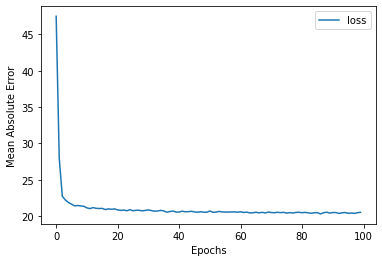

In [24]:
#plot history (Also known as loss curve or a training curve)
pd.DataFrame(history2.history).plot()
plt.ylabel("Mean Absolute Error")
plt.xlabel("Epochs")

So this time I get MAE of 21.48 which is better than last time. 

I would like to make a new model with the same dataset previously used but this time different scaling technique (minmax) and `adam` optimizer.

In [25]:
#separating dataset into dependent and independent features
X = df_soc_stock_t_ha_200.drop(["year", "soc_stock_t_ha"], axis = 1)
y = df_soc_stock_t_ha_200["soc_stock_t_ha"]

#splitting dataset into training and testing part (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

#pre-processing using MinMax scalar
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#building and creating the neural network model
tf.random.set_seed(64)
tf_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
tf_model3.compile(loss = 'mae', 
                  optimizer = 'adam')

#fit the model
history3 = tf_model3.fit(X_train, y_train, batch_size = 64, epochs = 100, verbose = 0)

#viewing the summary of the trained model
tf_model3.summary()

#evaluating the model
tf_model3.evaluate(X_test, y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               30500     
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 36,071
Trainable params: 36,071
Non-trainable params: 0
_________________________________________________________________
30/30 [==============================] - 0s 1ms/step - loss: 21.0131


21.0130672454834

Text(0.5, 0, 'Epochs')

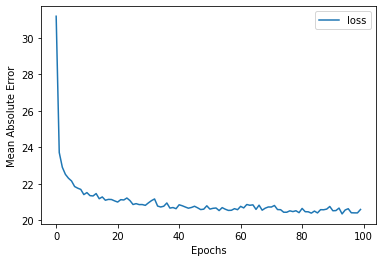

In [26]:
#plot history (Also known as loss curve or a training curve)
pd.DataFrame(history3.history).plot()
plt.ylabel("Mean Absolute Error")
plt.xlabel("Epochs")

So now I get a slightly better model with MAE of 21.01 as compared to the second deep learning model.

## Additional Notes

If more time was given for this challenge, I would also be curious to carry out the following:

- More hyperparameter tuning and changes in neural-net layers
- Using different activation layers functions
- Principal Component Analysis (PCA)
- Feature Selection using various techniques and automated feature selection using featurewiz
- Up-sampling or Down-Sampling of the target variable
- Stratisfied Sampling and much more

### Limitations

- Time restriction of 2 hours (lazypredict took most of the time but this was done in background while other steps were carried out)
- Lack of knowledge about the dataset (data dictionary)
- Lack of context over data beside the target variable, which restricts extensive EDA
- Unfamiliar terms and abbreviations of the column names

I appreciate the opportunity given. It was fun working on this completely unknown dataset.